In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
#matplotlib.rcParams.update({'font.size': 30})

In [3]:
from fase.fileio import Table

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/h5py/_hl/group.py:22: 

In [4]:
em = Table('../data/EmLinesPhys_150617.fits')

In [5]:
em.getColNames()

array(['SPECID', 'SURVEY', 'IS_SBEST', 'IS_BEST', 'SKYABS_FLAG',
       'EMLINE_METHOD', 'EMLINE_CLASS', 'CATAID', 'RA', 'DEC', 'Z',
       'Z_TONRY', 'ZMAX_19P8', 'NQ', 'PETRORAD_R', 'ABSMAG_G', 'ABSMAG_R',
       'SN', 'NIIR_HA', 'OIIIR_HB', 'F_HALPHA', 'F_HBETA',
       'BALMER_DECREMENT', 'BALMER_DECREMENT_FLAG', 'L_APCOR',
       'L_APOBSCOR', 'L_APOBSCOR_EMP', 'SFR', 'ANGULAR_DIAM_DIST',
       'PHYS_TRANSV_DIST', 'SIGMA_SFR'], dtype='|S21')

In [6]:
niiha = em.getCol('NIIR_HA')

In [85]:
len(niiha)

427829

In [7]:
oiiihb = em.getCol('OIIIR_HB')

In [8]:
z = em.getCol('Z')

In [9]:
SN = em.getCol('SN')
SFR = em.getCol('SFR')
RA = em.getCol('RA')
DEC = em.getCol('DEC')

In [90]:
F_Ha = em.getCol('F_HALPHA')
F_Hb = em.getCol('F_HBETA')

In [11]:
D_A = em.getCol('ANGULAR_DIAM_DIST') 

In [12]:
print(len(niiha))
print(len(oiiihb))

427829
427829


In [89]:
sel = np.where((niiha>-20)&(oiiihb>-30))
niiha = niiha[sel]
oiiihb = oiiihb[sel]
sfr = SFR[sel]

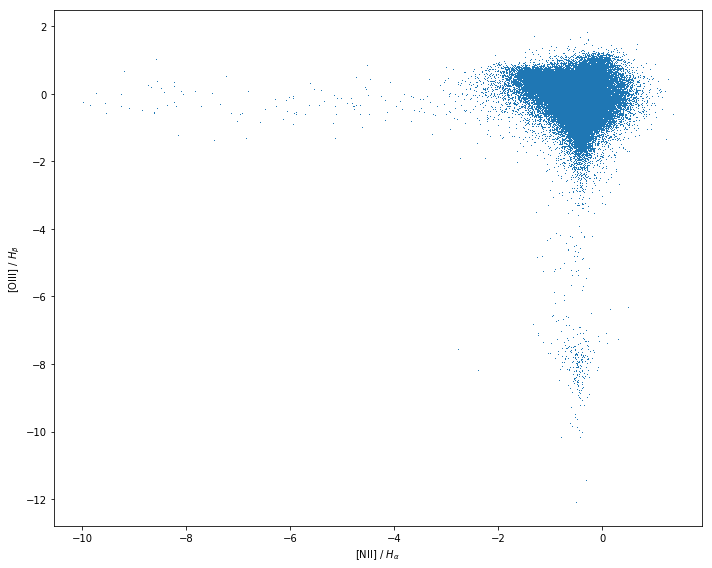

In [9]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',')
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.tight_layout()
plt.savefig('../plots/20/BPT_goodpoints.png')
plt.show()

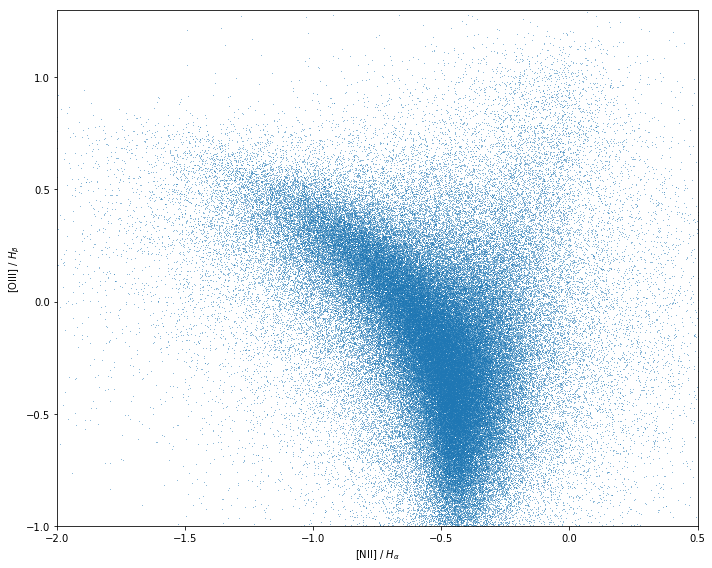

In [10]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',',alpha=0.5)
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(-2,0.5)
plt.ylim(-1,1.3)
plt.tight_layout()
#plt.savefig('../plots/20/BPT_zoom_madusha.png')
plt.show()

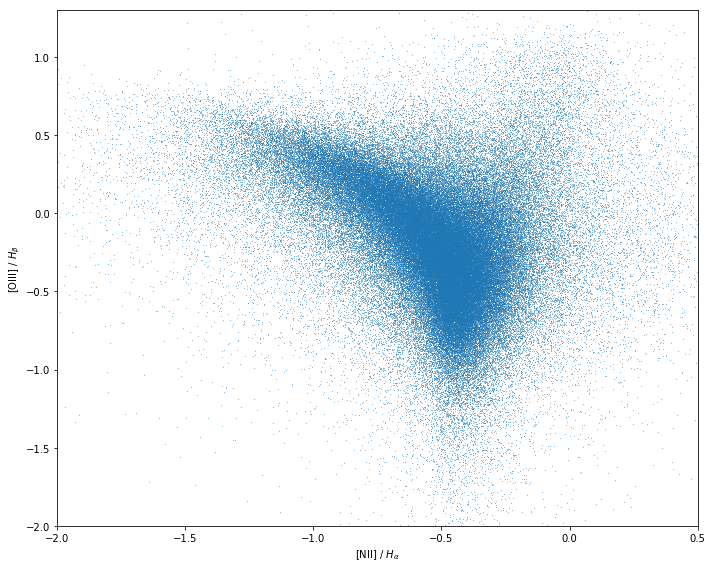

In [11]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',',alpha=0.5)
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(-2,0.5)
plt.ylim(-2,1.3)
plt.tight_layout()
#plt.savefig('../plots/20/BPT_zoom_casual.png')
plt.show()

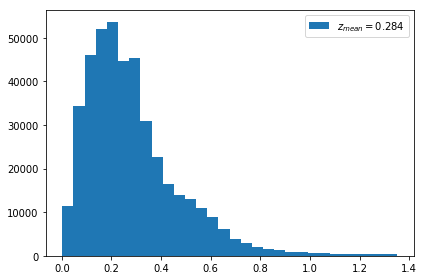

z mean =  0.28453052


In [13]:
plt.hist(z,bins=30,label=r'$z_{mean} = 0.284$')
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/z_histo.png')
plt.show()
print 'z mean = ',z.mean()

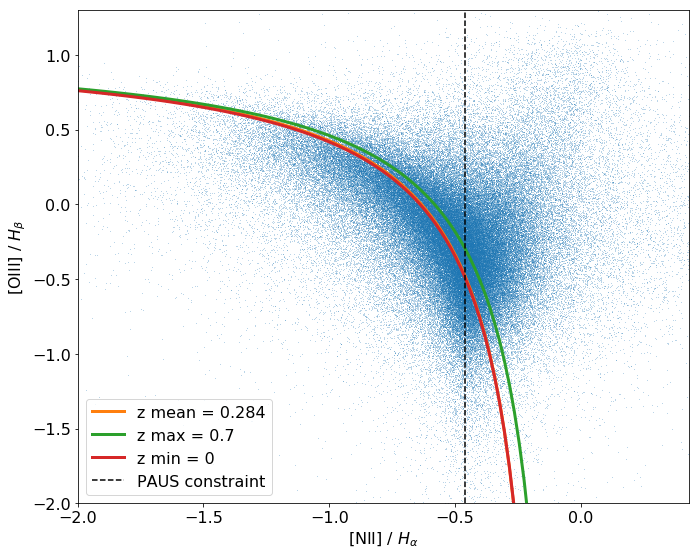

In [108]:
x1 = -2
x2 = 0.5

zmean = z.mean()

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))
#plt.axvline(-0.069,ls='dashed',lw=10)
plt.plot(niiha,oiiihb,',',alpha=0.3)
plt.plot(x,y,lw=3,label='z mean = 0.284')
plt.plot(x,ymax,lw=3,label='z max = 0.7')
plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.axvline(-0.46,c='k',ls='dashed',label='PAUS constraint')

plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/BPT_fit_plus.png')
plt.show()

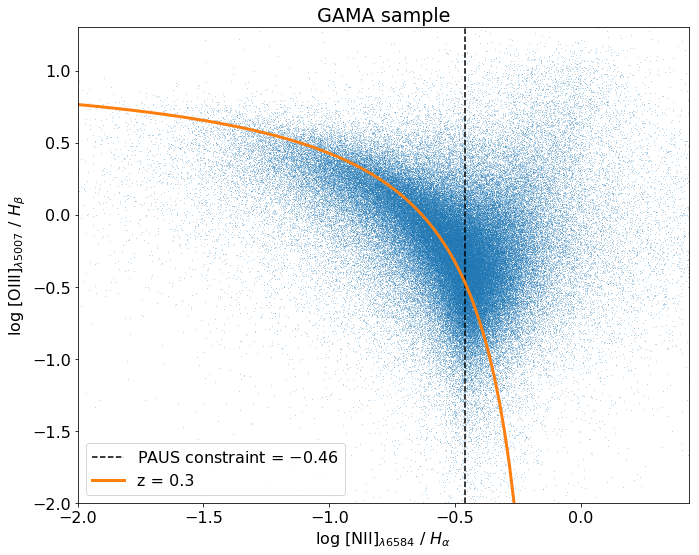

In [123]:
x1 = -2
x2 = 0.5

#zmean = z.mean()
zmean = 0.3

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))


#plt.axvline(-0.069,ls='dashed',lw=10)
plt.plot(niiha,oiiihb,',',alpha=0.3)
plt.axvline(-0.46,c='k',ls='dashed',label=r'PAUS constraint = $-0.46$')
plt.plot(x,y,lw=3,label='z = 0.3')

#plt.plot(x,ymax,lw=3,label='z max = 0.7')
#plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')
plt.ylabel(r'log [OIII]$_{\lambda5007}$ / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
plt.title('GAMA sample')
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/BPT_z03.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


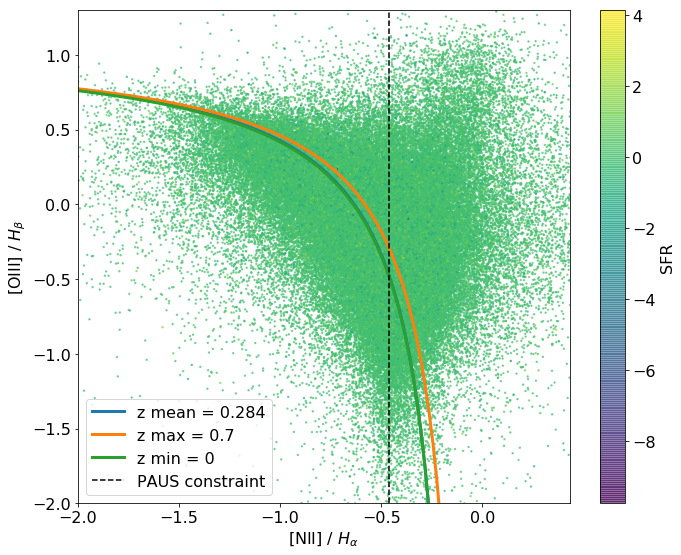

In [107]:
x1 = -2
x2 = 0.5

zmean = z.mean()

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))
#plt.axvline(-0.069,ls='dashed',lw=10)
plt.scatter(niiha,oiiihb,c=np.nan_to_num(np.log10(sfr)),alpha=0.6,s=2)
plt.plot(x,y,lw=3,label='z mean = 0.284')
plt.plot(x,ymax,lw=3,label='z max = 0.7')
plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.axvline(-0.46,c='k',ls='dashed',label='PAUS constraint')

plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
plt.legend()
plt.colorbar(label='SFR')
plt.tight_layout()
plt.savefig('../plots/20/BPT_fit_colour.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([6.70000e+01, 9.20000e+01, 9.70000e+01, 1.56000e+02, 2.31000e+02,
        3.19000e+02, 4.20000e+02, 5.66000e+02, 6.85000e+02, 1.00700e+03,
        1.34300e+03, 1.50200e+03, 1.66500e+03, 1.84100e+03, 2.08100e+03,
        1.40082e+05, 2.27000e+03, 2.20200e+03, 2.24600e+03, 2.11200e+03,
        1.90900e+03, 1.56700e+03, 1.16300e+03, 9.04000e+02, 5.60000e+02,
        3.62000e+02, 2.25000e+02, 1.52000e+02, 7.00000e+01, 3.90000e+01]),
 array([-2.        , -1.86666667, -1.73333333, -1.6       , -1.46666667,
        -1.33333333, -1.2       , -1.06666667, -0.93333333, -0.8       ,
        -0.66666667, -0.53333333, -0.4       , -0.26666667, -0.13333333,
         0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
         0.66666667,  0.8       ,  0.93333333,  1.06666667,  1.2       ,
         1.33333333,  1.46666667,  1.6       ,  1.73333333,  1.86666667,
         2.        ]),
 <a list of 30 Patch objects>)

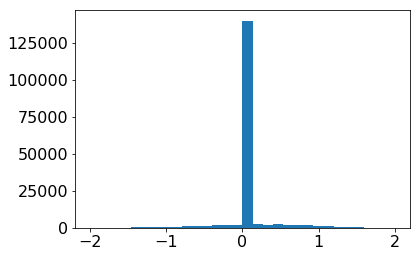

In [103]:
plt.hist(np.nan_to_num(np.log10(sfr)),bins=30,range=(-2,2))

In [97]:
np.log10(sfr)

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan, ..., 1.15641527,        nan,
              nan])

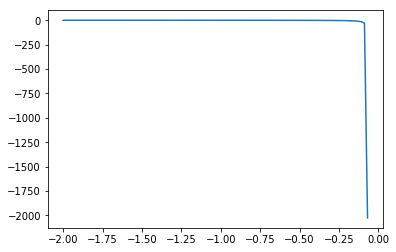

In [15]:
plt.plot(x,y)

In [16]:
em.getColNames()

array(['SPECID', 'SURVEY', 'IS_SBEST', 'IS_BEST', 'SKYABS_FLAG',
       'EMLINE_METHOD', 'EMLINE_CLASS', 'CATAID', 'RA', 'DEC', 'Z',
       'Z_TONRY', 'ZMAX_19P8', 'NQ', 'PETRORAD_R', 'ABSMAG_G', 'ABSMAG_R',
       'SN', 'NIIR_HA', 'OIIIR_HB', 'F_HALPHA', 'F_HBETA',
       'BALMER_DECREMENT', 'BALMER_DECREMENT_FLAG', 'L_APCOR',
       'L_APOBSCOR', 'L_APOBSCOR_EMP', 'SFR', 'ANGULAR_DIAM_DIST',
       'PHYS_TRANSV_DIST', 'SIGMA_SFR'], dtype='|S21')

# Checks

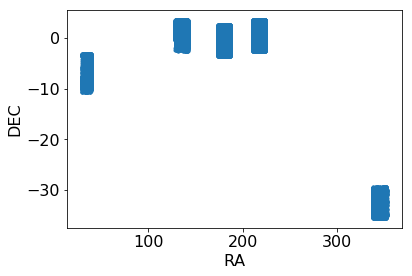

In [75]:
plt.plot(RA,DEC,'.')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [25]:
print(len(RA))
print(len(DEC))

427829
427829


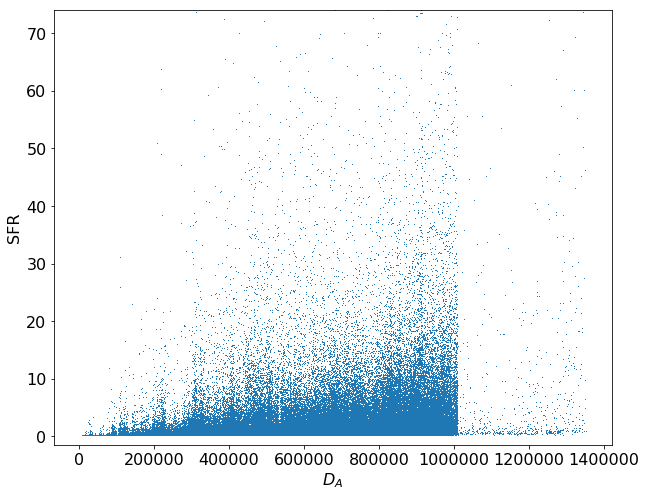

In [74]:
plt.figure(figsize=(10,8))
plt.plot(D_A,SFR,",")
plt.xlabel(r'$D_A$')
plt.ylabel('SFR')
plt.ylim(-1.5,74.)
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


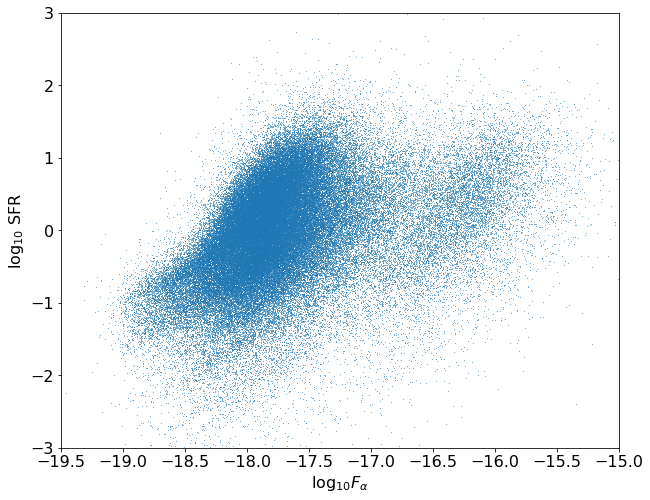

In [86]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(F_Ha),np.log10(SFR),",",alpha=0.6)
plt.ylim(-3,3)
plt.xlim(-19.5,-15)
plt.xlabel(r'$\log_{10} F_{\alpha}$')
plt.ylabel(r'$\log_{10} $ SFR')
plt.savefig('../plots/20/H_alpha_SFR.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


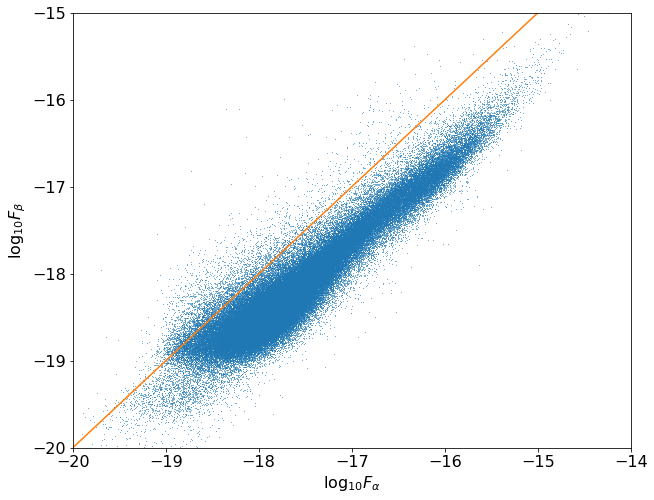

In [87]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(F_Ha),np.log10(F_Hb),",",alpha=0.6)
plt.xlabel(r'$\log_{10} F_{\alpha}$')
plt.ylabel(r'$\log_{10} F_{\beta}$')
plt.xlim(-20,-14)
plt.ylim(-20,-15)
plt.plot(np.linspace(-20,-14),np.linspace(-20,-14))
plt.savefig('../plots/20/H_alpha_H_beta.png')
plt.show()

# Kewley 2001

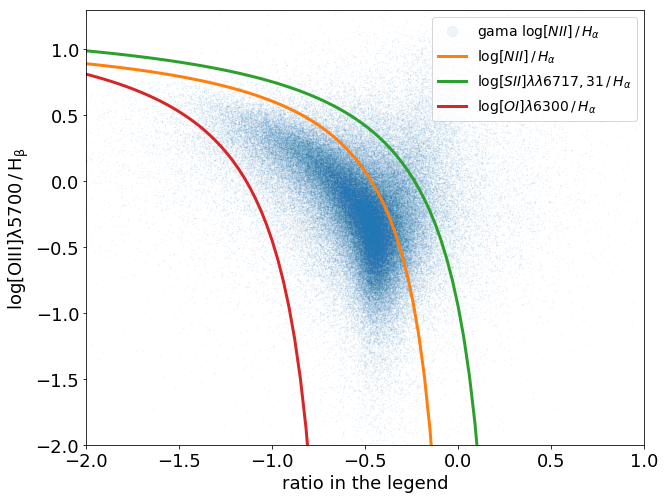

In [27]:
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))
plt.ylim(-2,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)
       
#y_4 = 0.61/(x - 0.05)+1.3 # x = log([NII]/Ha)
    
plt.plot(niiha,oiiihb,'.',markersize=1,alpha=0.07,label=r'gama $\log [NII] \, / \, H_{\alpha}$ ')
    
plt.plot(x[x<0.047],y_1[x<0.047],lw=3,label=r'$\log [NII] \, / \, H_{\alpha}$')
plt.plot(x[x<0.32],y_2[x<0.32],lw=3,label=r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')
plt.plot(x[x<-0.59],y_3[x<-0.59],lw=3,label=r'$\log [OI]\lambda 6300 \, / \, H_{\alpha}$')
#plt.plot(x[x<0.05],y_4[x<0.05],lw=3,label=r'$\log [NII] \, / \, H_{\alpha}$')
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel('ratio in the legend')
plt.legend(loc=1,fontsize=14,markerscale=20.)
plt.savefig('../plots/20/alternative_BPT.png')
plt.show()

# Other table from GAMA

In [28]:
Gauss = Table('../data/GaussFitSimplev05.fits')

In [72]:
Gauss.getColNames()

array(['SPECID', 'CATAID', 'RA', 'DEC', 'Z', 'NQ', 'SURVEY',
       'SURVEY_CODE', 'IS_BEST', 'IS_SBEST', 'SN', 'MEAN_CONT',
       'SIGMA_CONT', 'FSCALE', 'D4000N', 'D4000N_ERR', 'OII_CONT',
       'OII_CONT_ERR', 'OII_GRAD', 'OII_GRAD_ERR', 'OII_REDCHI_LINE',
       'OII_REDCHI_EM', 'OII_FITFAIL', 'OII_MODSEL_EM_LINE', 'OII_BF',
       'OII_DELBIC', 'OII_DELAIC', 'OII_CEN', 'AMP_OIIR', 'AMP_OIIR_ERR',
       'POS_OIIR', 'POS_OIIR_ERR', 'SIG_OIIR', 'SIG_OIIR_ERR',
       'OIIR_FLUX', 'OIIR_FLUX_ERR', 'OIIR_EW', 'OIIR_EW_ERR', 'AMP_OIIB',
       'AMP_OIIB_ERR', 'POS_OIIB', 'POS_OIIB_ERR', 'SIG_OIIB',
       'SIG_OIIB_ERR', 'OIIB_FLUX', 'OIIB_FLUX_ERR', 'OIIB_EW',
       'OIIB_EW_ERR', 'OIIB_NPEG', 'OIIR_NPEG', 'HB_CONT', 'HB_CONT_ERR',
       'HB_GRAD', 'HB_GRAD_ERR', 'HB_REDCHI_LINE', 'HB_REDCHI_ABS',
       'HB_REDCHI_EM', 'HB_FITFAIL', 'HB_MODSEL_EM_LINE',
       'HB_MODSEL_ABS_LINE', 'HB_MODSEL_EM_ABS', 'HB_BF', 'HB_DELBIC',
       'HB_DELAIC', 'HB_CEN', 'AMP_HB', 'AMP_HB_ERR', 'PO

In [169]:
SIIR_ = Gauss.getCol('SIIR_FLUX')
#SIIR = Gauss.getCol('AMP_SIIR')
SIIB_ = Gauss.getCol('SIIB_FLUX')
#SIIB = Gauss.getCol('AMP_SIIB')

SII_tot_= SIIR_ + SIIB_
SII_tot = SII_tot_*10**(-20)

SIIR = SIIR_*10**(-20)

In [86]:
len(SIIB)

427829

In [131]:
OIIIR_ = Gauss.getCol('OIIIR_FLUX')
#OIIIR = Gauss.getCol('AMP_OIIIR')
OIIIB_ = Gauss.getCol('OIIIB_FLUX')
#OIIIB = Gauss.getCol('AMP_OIIIB')

OIIIR = OIIIR_*10**(-20)


In [132]:
NIIR_ = Gauss.getCol('NIIR_FLUX')
#NIIR = Gauss.getCol('AMP_NIIR')
NIIB_ = Gauss.getCol('NIIB_FLUX')
#NIIB = Gauss.getCol('AMP_NIIB')
NIIR_NPEG = Gauss.getCol('NIIR_NPEG')

NIIR = NIIR_*10**(-20)


In [133]:
#use Ha and Hb from EmLinePhys.fits
HB_ = Gauss.getCol('HB_FLUX')
#HB = Gauss.getCol('AMP_HB')
HA_ = Gauss.getCol('HA_FLUX')
#HA = Gauss.getCol('AMP_HA')

In [180]:
OIR_ = Gauss.getCol('OIR_FLUX')
#OIR = Gauss.getCol('AMP_OIR')
OIB_ = Gauss.getCol('OIB_FLUX')
#OIB = Gauss.getCol('AMP_OIB')

OIR = OIR_*10**(-20)

In [135]:
SN = Gauss.getCol('SN') # Signal to noise (>3 = accettable)
NQ = Gauss.getCol('NQ') # Normalized quality (>2 = accettable)
IS_BEST = Gauss.getCol('IS_BEST') # =1 choose the best spectrum independently from the SUrvey
SURVEY = Gauss.getCol('SURVEY')
select_good = np.where((SN>3)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0))

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


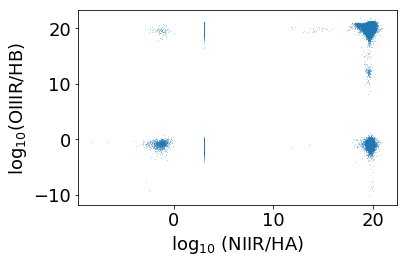

In [137]:
plt.plot(np.log10(NIIR_/F_Ha)[select_good],np.log10(OIIIR_/F_Hb)[select_good],',',alpha=0.3)
#plt.xlim(18,20.5)
#plt.ylim(17.5,22)

#plt.ylim(-2,1.3)
#plt.xlim(-2.,1.)

plt.xlabel('log$_{10}$ (NIIR/HA)')
plt.ylabel('log$_{10}$(OIIIR/HB)')
plt.tight_layout()
#plt.savefig('../plots/20/weird_BPT_top_right.png')
plt.show()

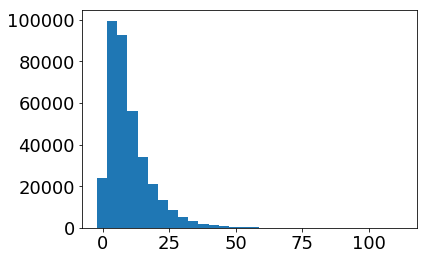

In [138]:
plt.hist(Gauss.getCol('SN'),bins=30,range=(-2.2,112.2))
plt.show()

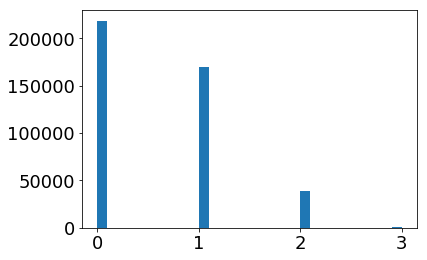

In [139]:
plt.hist(Gauss.getCol('HB_NPEG'),bins=30)#,range=(-2.2,112.2))
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


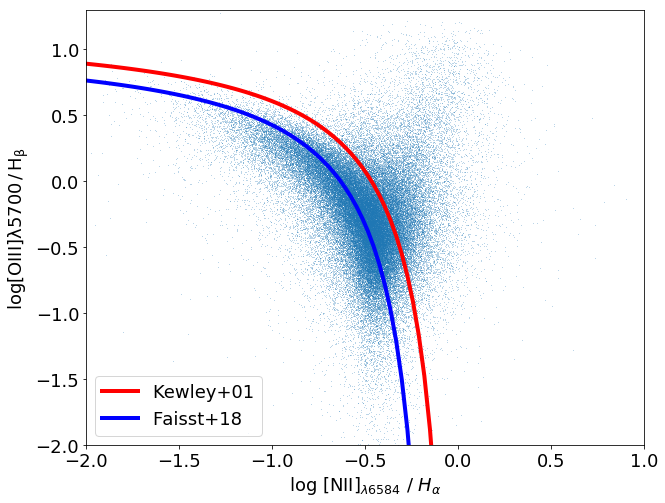

In [171]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_NII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(NIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(NIIR/F_Ha)[select_good_NII],np.log10(OIIIR/F_Hb)[select_good_NII],',',alpha=0.3)
plt.ylim(-2.,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#Faisst+18
redshift =0.3
y_0 = (0.61/(x + 0.138 - 0.042*(1+redshift)**2))+1.08
root = -(+ 0.138 - 0.042*(1+redshift)**2)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

plt.plot(x[x<0.047],y_1[x<0.047],lw=4,label=r'Kewley+01',c='r')
plt.plot(x[x<root],y_0[x<root],lw=4,label=r'Faisst+18',c='b')


plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')

plt.legend()
plt.savefig('../plots/20/NII_GAMA_BPT_Faisst_Kewley.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


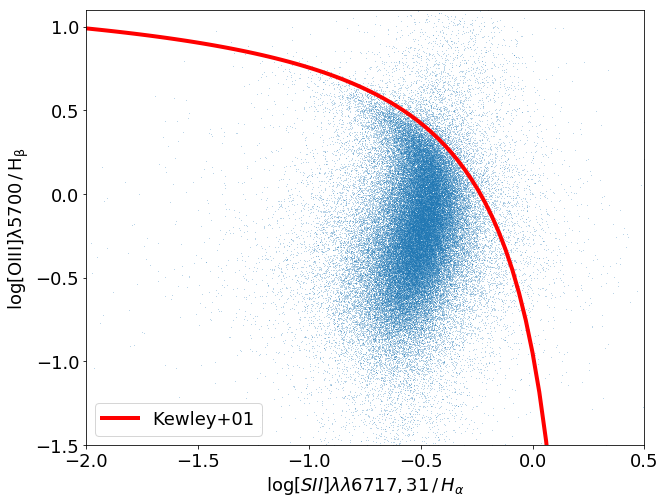

In [179]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(SII_tot/F_Ha)[select_good_SII],np.log10(OIIIR/F_Hb)[select_good_SII],',',alpha=0.3)
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')


plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend()
plt.savefig('../plots/20/SII_GAMA_BPT_Kewley.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


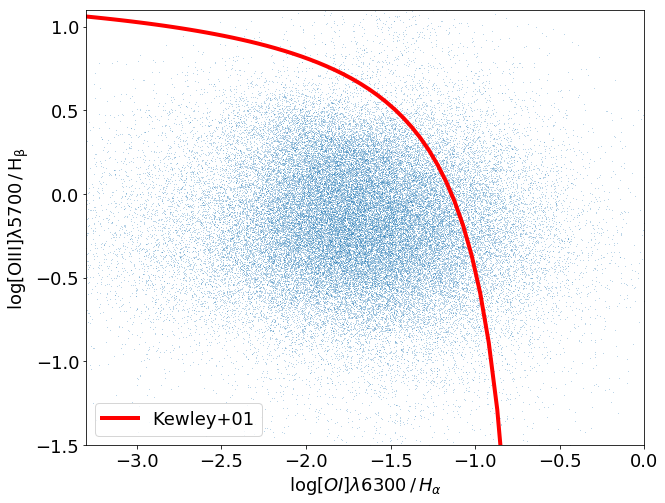

In [191]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_OI = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(OIR_>0)&(OIIIR_>0))
plt.plot(np.log10(OIR/F_Ha)[select_good_OI],np.log10(OIIIR/F_Hb)[select_good_OI],',',alpha=0.3)
plt.ylim(-1.5,1.1)
plt.xlim(-3.3,0.0)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [OI]\lambda 6300 \, / \, H_{\alpha}$')

x = np.linspace(-4,1,100)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

plt.plot(x[x<-0.59],y_3[x<-0.59],lw=4,label=r'Kewley+01',c='r')
plt.legend()
plt.savefig('../plots/20/OI_GAMA_BPT_Kewley.png')
plt.show()

# Invert $\frac{OIII}{H_{\beta}} vs \frac{SII}{H_{\alpha}}$ relation

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


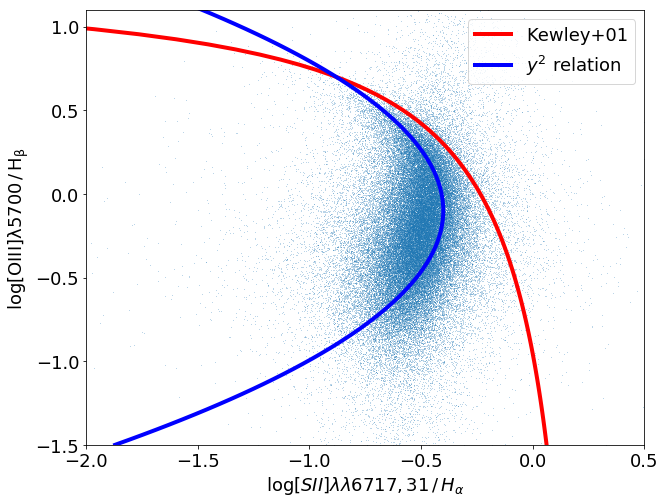

In [247]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4


select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(SII_tot/F_Ha)[select_good_SII],np.log10(OIIIR/F_Hb)[select_good_SII],',',alpha=0.3)
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

plt.plot(x_inv,y_inv,lw = 4,c='r',label =r'Kewley+01')
plt.plot(x_inv_2,y_inv,lw = 4,c='b',label =r'$y^2$ relation')


#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=1)
plt.savefig('../plots/20/SII_GAMA_BPT_Kewley_inverse_square.png')
plt.show()

# Relation in Jarle Brinchmann 2008 for star-forming galaxies

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


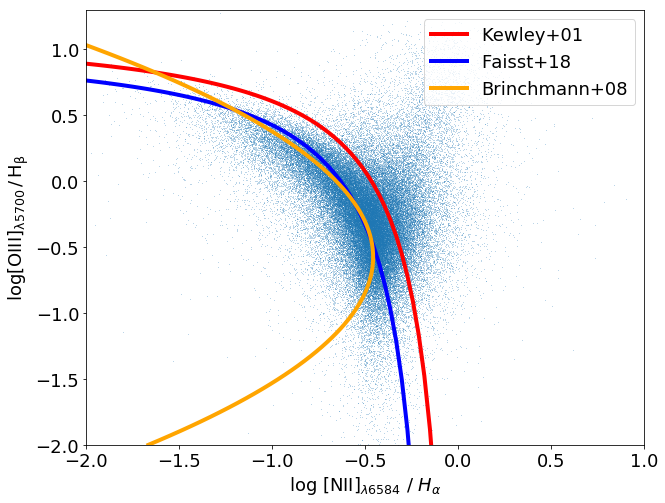

In [253]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_NII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(NIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(NIIR/F_Ha)[select_good_NII],np.log10(OIIIR/F_Hb)[select_good_NII],',',alpha=0.3)
plt.ylim(-2.,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#Faisst+18
redshift =0.3
y_0 = (0.61/(x + 0.138 - 0.042*(1+redshift)**2))+1.08
root = -(+ 0.138 - 0.042*(1+redshift)**2)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

y_inv_brinch = np.linspace(-2,1.5,100)
x_inv_brinch = -0.596*y_inv_brinch**2 -0.687*y_inv_brinch -0.655

plt.plot(x[x<0.047],y_1[x<0.047],lw=4,label=r'Kewley+01',c='r')
plt.plot(x[x<root],y_0[x<root],lw=4,label=r'Faisst+18',c='b')
plt.plot(x_inv_brinch,y_inv_brinch,lw=4,label=r'Brinchmann+08',c='orange')

plt.ylabel(r'$\log \rm{[OIII]}_{\lambda 5700} \, / \, H_{\beta}$')
plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')

plt.legend(loc=1)
plt.savefig('../plots/20/NII_GAMA_BPT_Faisst_Kewley_Brinchmann.png')
plt.show()